In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
mse_list = []
mae_list = []
corr_list = []
representation_name_list = []
for path in Path("/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/affinity_prediction/")\
.glob("Affinity_prediction_skempiv1_*_detail.csv"):
    #print(path)
    representation_name_list.append(str(path).split("skempiv1_")[1].split("_detail.csv")[0])
    mse_list.append(pd.read_csv(path)['val_mse_errors'])
    mae_list.append(pd.read_csv(path)['val_mae_errors'])
    corr_list.append(pd.read_csv(path)['validation_corr'])

col_rename_dict = {'AAC':'AAC','ALBERT':'ProtALBERT','APAAC':'APAAC','BERT-BFD':'ProtBERT-BFD','BERT-PFAM':'TAPE-BERT-PFAM',\
                   'BLAST':'BLAST','CPC-PROT':'CPCProt','ESMB1':'ESM-1b','GENE2VEC':'Gene2Vec','HMMER':'HMMER','K-SEP':'K-Sep',\
                   'LEARNED-VEC':'Learned-Vec','MSA_Transformer':'MSA-Transformer','MUT2VEC':'Mut2Vec','PFAM':'PFAM',\
                   'PROTVEC':'ProtVec','SEQVEC':'SeqVec','T5':'ProtT5-XL','TCGA-EMBEDDING':'TCGA-Embedding',\
                   'UNIREP':'UniRep','XLNET':'ProtXLNet'}

df_mse = pd.concat(mse_list, axis=1)
df_mse.columns = representation_name_list
#Sorting columns by their mean value
df_mse.rename(columns=col_rename_dict, inplace=True)
df_mse = df_mse.reindex(df_mse.mean().sort_values(ascending=False).index, axis=1)

df_mae = pd.concat(mae_list, axis=1)
df_mae.columns = representation_name_list
#Sorting columns by their mean value
df_mae.rename(columns=col_rename_dict, inplace=True) 
df_mae = df_mae.reindex(df_mae.mean().sort_values(ascending=False).index, axis=1)

df_corr = pd.concat(corr_list, axis=1)
df_corr.columns = representation_name_list
#Sorting columns by their mean value
df_corr.rename(columns=col_rename_dict, inplace=True)
df_corr = df_corr.reindex(df_corr.mean().sort_values().index, axis=1)

columnsTitles = ['K-Sep','APAAC','PFAM','AAC','ProtVec','Learned-Vec','SeqVec','CPCProt','MSA-Transformer','ProtBERT-BFD',\
                 'TAPE-BERT-PFAM','ESM-1b','ProtALBERT','ProtXLNet','UniRep','ProtT5-XL']

df_mse_table = df_mse[columnsTitles]
df_mae_table = df_mae[columnsTitles]
df_corr_table = df_corr[columnsTitles]

In [3]:
df_mse

,PFAM,AAC,APAAC,Learned-Vec,ProtVec,K-Sep,MSA-Transformer,UniRep,CPCProt,ProtXLNet,ProtT5-XL,ProtBERT-BFD,TAPE-BERT-PFAM,SeqVec,ESM-1b,ProtALBERT
0,2.108073,1.683668,1.756543,1.016695,0.945078,0.819674,0.834127,0.660293,0.613292,0.575570,0.542026,0.444817,0.486842,0.485027,0.450163,0.363818
1,2.369755,1.948253,1.877006,1.161348,1.107979,1.074306,0.935961,0.762166,0.738369,0.682961,0.537978,0.611387,0.609138,0.589129,0.493169,0.414565
2,2.273111,1.944204,1.756783,1.279863,1.184138,1.074676,0.918776,0.686010,0.854581,0.569832,0.527603,0.926363,0.532121,0.538995,0.434206,0.422572
3,2.424406,1.930600,1.938557,1.227308,1.305883,1.072209,0.919206,0.732935,0.808556,0.712379,0.587362,0.566967,0.557599,0.600896,0.621966,0.418076
4,2.281235,1.696047,1.714857,1.171091,1.094767,0.846457,0.888975,0.683952,0.663005,0.587876,0.531136,0.486599,0.550132,0.511827,0.476562,0.376907
5,2.058992,1.648721,1.498729,1.047167,1.077726,0.989920,0.743666,0.658096,0.621654,0.512663,0.504556,0.529628,0.522924,0.482960,0.488588,0.385243
6,2.254950,1.854286,1.738988,1.250117,1.134837,0.856228,0.965069,0.712041,0.803881,0.695626,1.043043,0.671858,0.583105,0.587326,0.435311,0.533704
7,2.227672,1.839930,1.984052,1.253739,1.158530,1.137318,0.967583,0.888054,0.826819,0.655713,0.518099,0.555272,0.639272,0.586660,0.549829,0.515289
8,2.342703,2.013785,1.810791,1.133077,1.154163,0.981106,0.888210,0.761072,0.664550,0.520614,0.657308,0.463734,0.588213,0.498666,0.414722,0.316215
9,2.237945,1.918340,1.824198,1.307355,1.177525,0.853148,1.018583,0.776349,0.704288,0.554477,0.585781,0.479161,0.591227,0.449098,0.463862,0.436316


In [4]:
path = "/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/affinity_table_protbench.csv"
pd.DataFrame(dict(MSE = df_mse_table.mean(), MAE = df_mae_table.mean(),Corr= df_corr_table.mean())).to_csv(path)

In [5]:
#Classic Representations: Yellow
#Learned Small Scale Models: Blue
#Learned Large Scale Models: Red
group_color_dict = {'K-Sep':'green','TAPE-BERT-PFAM':'red', 'UniRep':'red', 'ProtT5-XL':'red', 'ProtBERT-BFD':'red',\
 'HMMER':'green', 'SeqVec':'red','MSA-Transformer':'red', 'ProtALBERT':'red', 'PFAM':'green', 'ESM-1b':'red', \
 'ProtXLNet':'red', 'AAC':'green', 'APAAC':'green', 'ProtVec':'blue',\
'Learned-Vec':'blue', 'CPCProt':'blue'}

def set_colors_and_marks_for_representation_groups(ax):
    for label in ax.get_yticklabels():
        label.set_color(group_color_dict[label.get_text()])
        #if label.get_text() == 'PFAM' or label.get_text() == 'BERT-PFAM' :
        #    signed_text = label.get_text() + "*"
        #    label.set_text(signed_text)
    ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

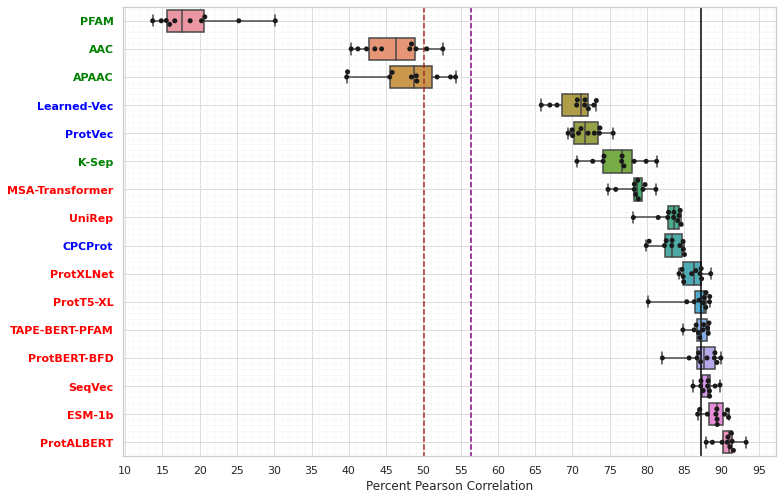

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_corr, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_corr, orient="h",color=".1")
ax.set_xlabel("Percent Pearson Correlation")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 87.3 
baseline_ac = 56.4
baseline_ctd = 50.1

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)


ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_corr.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_corr.eps', dpi=600)

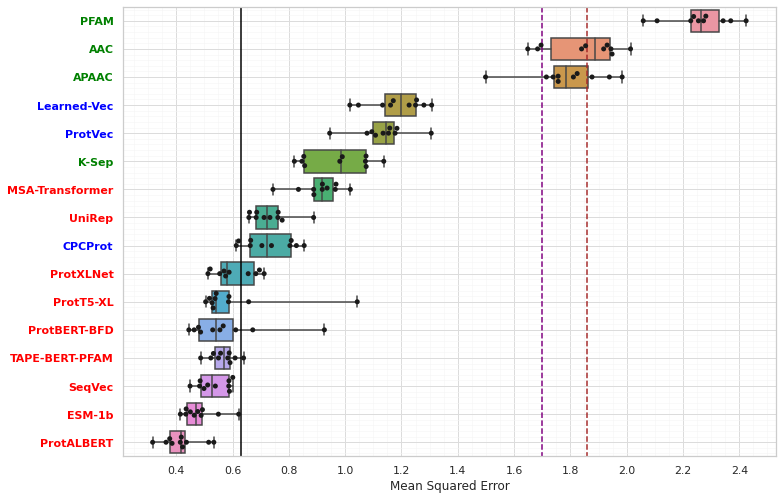

In [7]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_mse, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_mse, orient="h",color=".1")
ax.set_xlabel("Mean Squared Error")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 0.63
baseline_ac = 1.70
baseline_ctd = 1.86

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mse.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mse.eps', dpi=600)

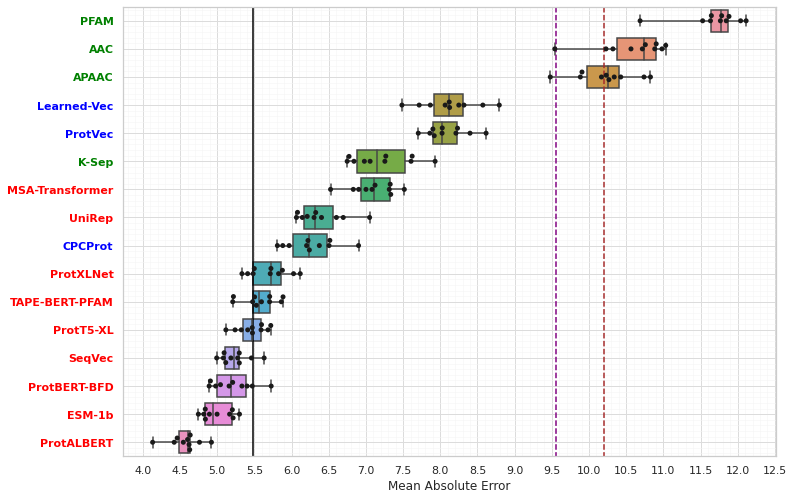

In [8]:
sns.set_theme(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid",color_codes=True)

ax = sns.boxplot(data=df_mae, whis=np.inf,  orient="h")
ax = sns.swarmplot(data=df_mae, orient="h",color=".1")
ax.set_xlabel("Mean Absolute Error")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='gainsboro', linewidth=1.0)
ax.grid(b=True, which='minor', color='whitesmoke', linewidth=0.5)

best_pipr = 5.48
baseline_ac = 9.56
baseline_ctd = 10.20

plt.plot((best_pipr,best_pipr),(-1,20),color='black')
plt.plot((baseline_ac,baseline_ac),(-1,20),color='purple',linestyle='dashed')
plt.plot((baseline_ctd,baseline_ctd),(-1,20),color='brown',linestyle='dashed')
set_colors_and_marks_for_representation_groups(ax)
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.png')
ax.get_figure()\
.savefig('/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/affinity_estimation_mae.eps', dpi=600)